### FCT-ITEC-UFPA

# Computação gráfica e processamento de imagens
### Nome: Erick Mamede Silva da Costa
### Matrícula: 201906840033


## Tarefa 01

In [50]:
!git clone https://github.com/erickmamede/PDI.git

fatal: destination path 'PDI' already exists and is not an empty directory.


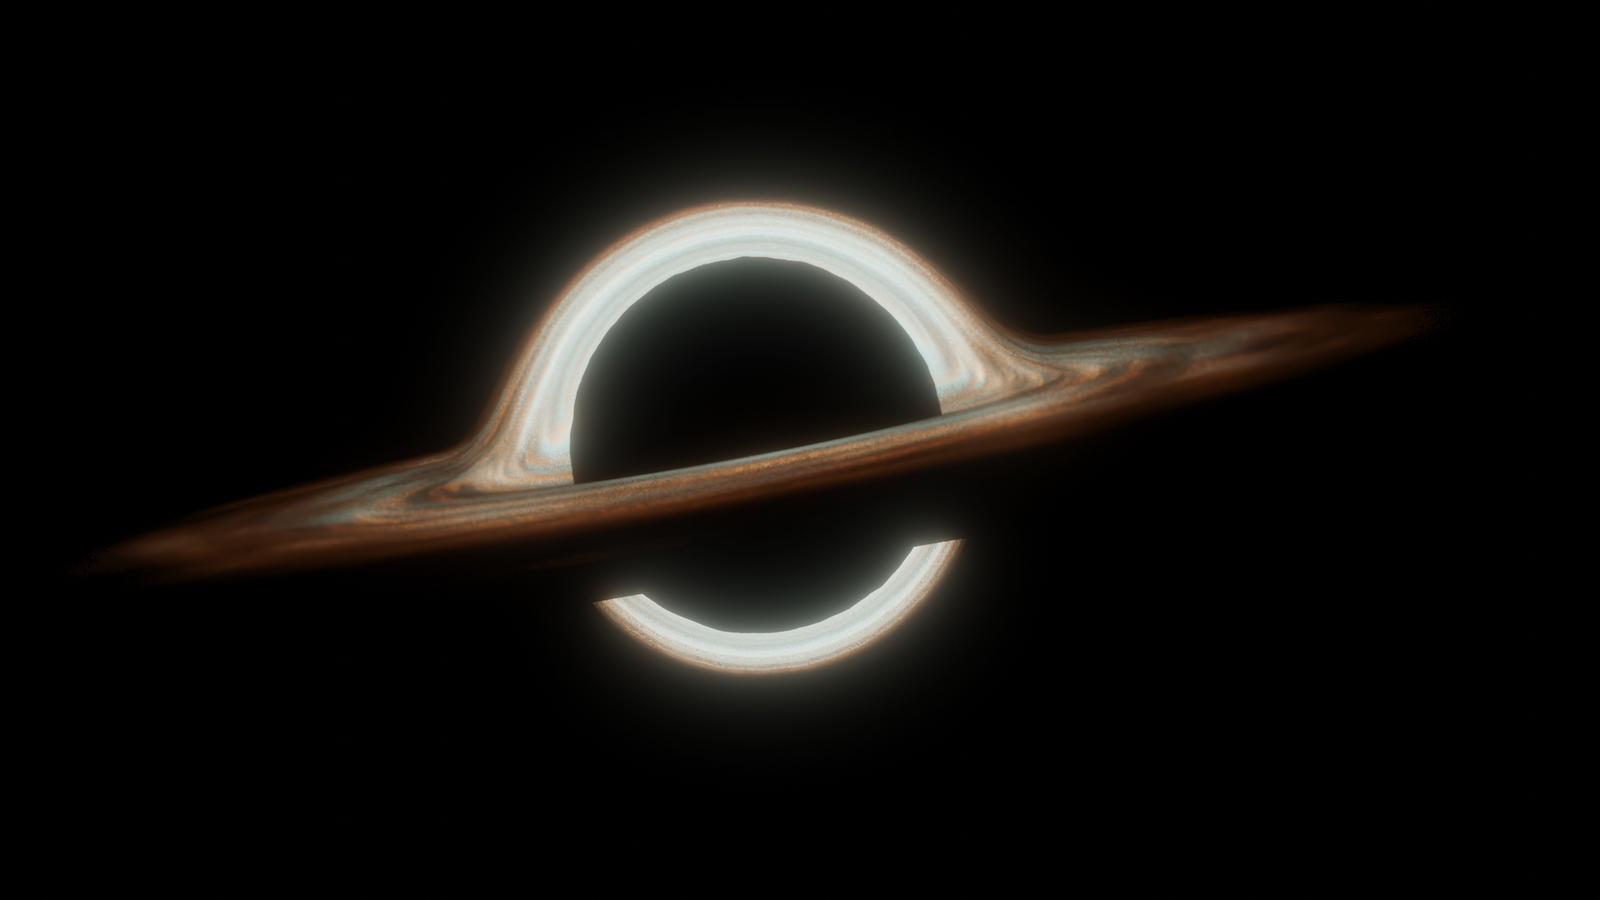

In [51]:
# Carrega módulos do Python
import numpy as np                # funções matemáticas 
import matplotlib.pyplot as plt   # traçado de gráficos
import cv2 as cv                  # biblioteca opencv (visão computacional)
from google.colab.patches import cv2_imshow # patch para OpenCV
import scipy                      # funções diversas (processamento de sinais e imagem)


path = '/content/PDI/tarefa_01.jpg' # caminho
nome_da_imagem = 'tarefa_01.jpg' # nome da imagem


##im_colour = cv2.imread( path ) # Lê uma imagem usando opencv

cv2_imshow(im_colour)

1. Implementar o filtro 2D uniforme para $L = 3$ e $L = 15$. Para cada um dos filtros, determine a resposta em frequência correspondente. Em seguida, exiba em gráficos 3D as respostas ao impulso e os módulos das respostas em frequência. Interprete e comente os resultados.

Filtro com L = 3
Respostaem frequencia :
[[0.11111111 0.11106237 0.11091618 ... 0.11067261 0.11091618 0.11106237]
 [0.11106237 0.11101366 0.11086753 ... 0.11062406 0.11086753 0.11101366]
 [0.11091618 0.11086753 0.1107216  ... 0.11047845 0.1107216  0.11086753]
 ...
 [0.11067261 0.11062406 0.11047845 ... 0.11023583 0.11047845 0.11062406]
 [0.11091618 0.11086753 0.1107216  ... 0.11047845 0.1107216  0.11086753]
 [0.11106237 0.11101366 0.11086753 ... 0.11062406 0.11086753 0.11101366]]


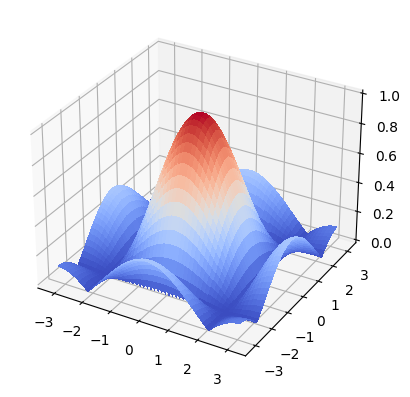

Filtro com L = 15
Respostaem frequencia :
[[0.00444444 0.00438997 0.00422785 ... 0.00396198 0.00422785 0.00438997]
 [0.00438997 0.00433616 0.00417602 ... 0.00391342 0.00417602 0.00433616]
 [0.00422785 0.00417602 0.0040218  ... 0.0037689  0.0040218  0.00417602]
 ...
 [0.00396198 0.00391342 0.0037689  ... 0.0035319  0.0037689  0.00391342]
 [0.00422785 0.00417602 0.0040218  ... 0.0037689  0.0040218  0.00417602]
 [0.00438997 0.00433616 0.00417602 ... 0.00391342 0.00417602 0.00433616]]


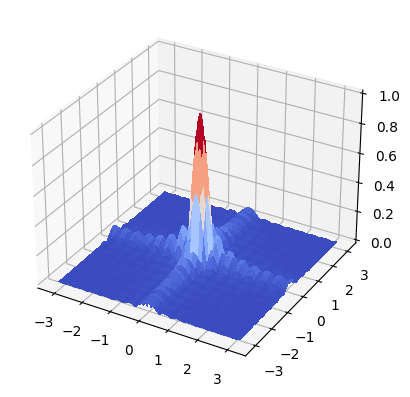

In [52]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
def filtro2D(L):
  h = np.ones((L,L))  # criação de matriz L x L, todos elementos iguais a 1
  # Exibe a resposta ao impulso 
  h = h/np.sum(h) # normalização (é a versão que iremos usar na filtragem)
  im_output = cv.filter2D( im_gray, -1, h )  # convolução 2D (pesquise o que significa o parâmetro 'ddepth')
  print("Filtro com L = " + str(L))
  #Resposta em frequência
  M = 300                       # número de pontos da FFT
  H = np.fft.fft2(h, [M, M])# calcula a 2D-FFT (transformada rápida de Fourier em duas dimensões)
  H = np.fft.fftshift( H )      # reordena a matriz H (range de -pi a pi)
  H_mag = np.abs(H)             # Calcula a magnitude da resposta em frequência
  print('Respostaem frequencia :')
  print(H_mag)
  
  # Vetores de dados
  u = np.linspace(-np.pi, np.pi, M) # vetor de frequências na direção x
  v = np.linspace(-np.pi, np.pi, M) # vetor de frequências na direção y
  u, v = np.meshgrid(u, v)
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

  # Traçado da superfície
  surf = ax.plot_surface(u, v, H_mag, cmap=cm.coolwarm,linewidth=0, antialiased=False)

  plt.show()

im_gray = cv.cvtColor(im_colour, cv.COLOR_BGR2GRAY)  # conversão para escala de cinza (para outros mapas de cores é a mesma função, só muda um parâmetro)
filtro2D(3)
filtro2D(15)

2. Para os filtros da questão anterior, determine as respectivas respostas para uma dada imagem de entrada (em níveis de cinza, a sua escolha). Observe o resultado, compare com o resultado da questão anterior, e comente.

Imagem fonte


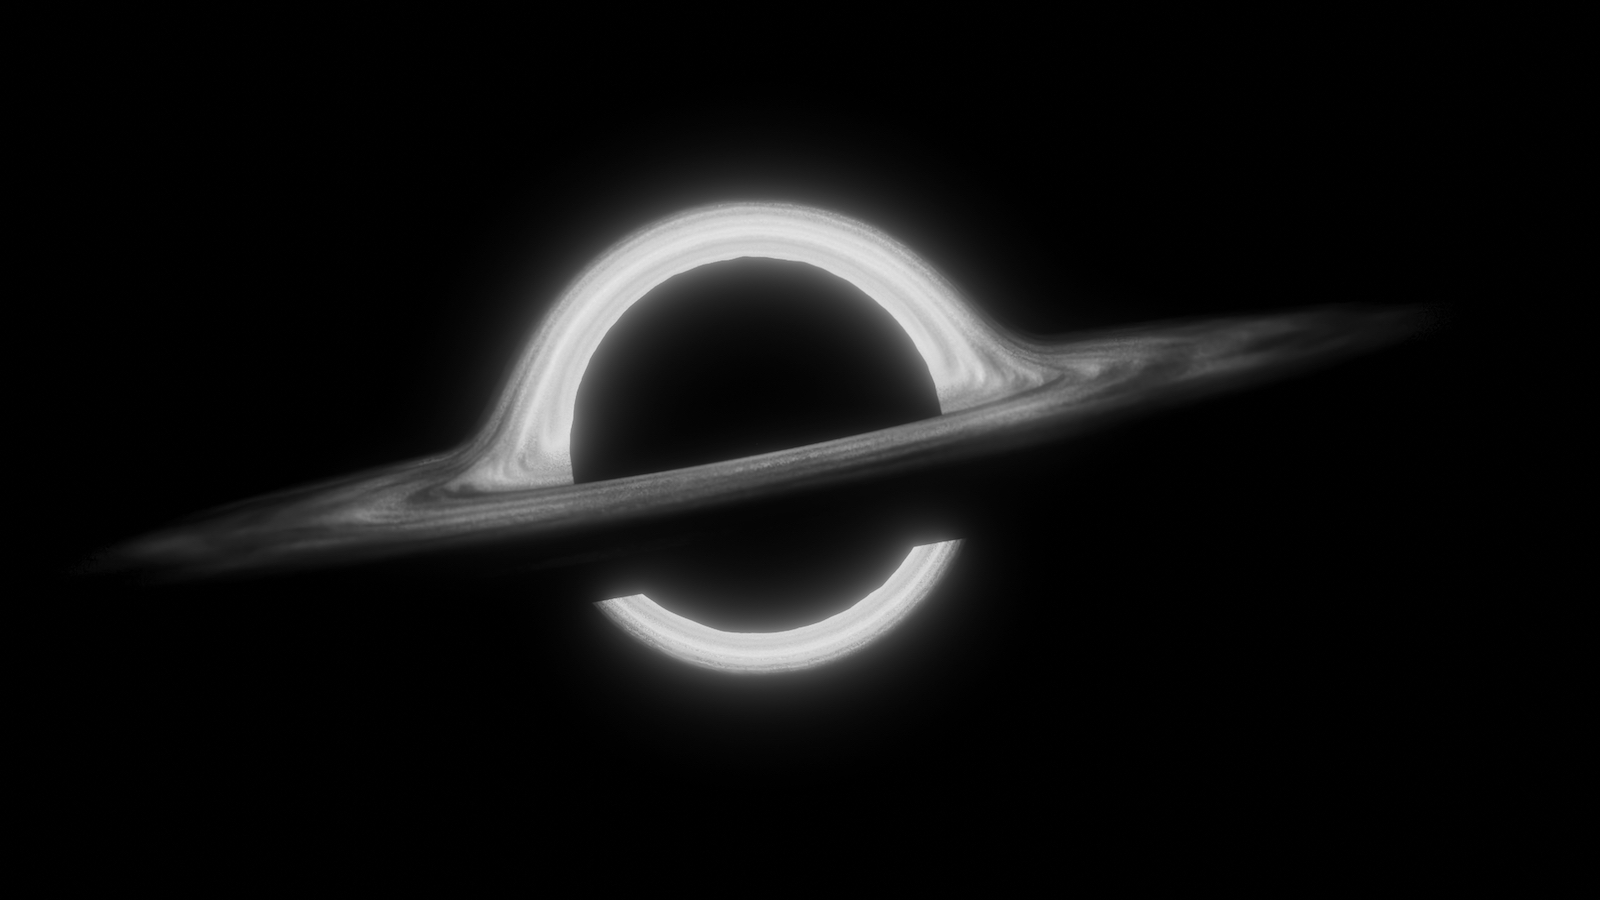

Filtro com L = 3


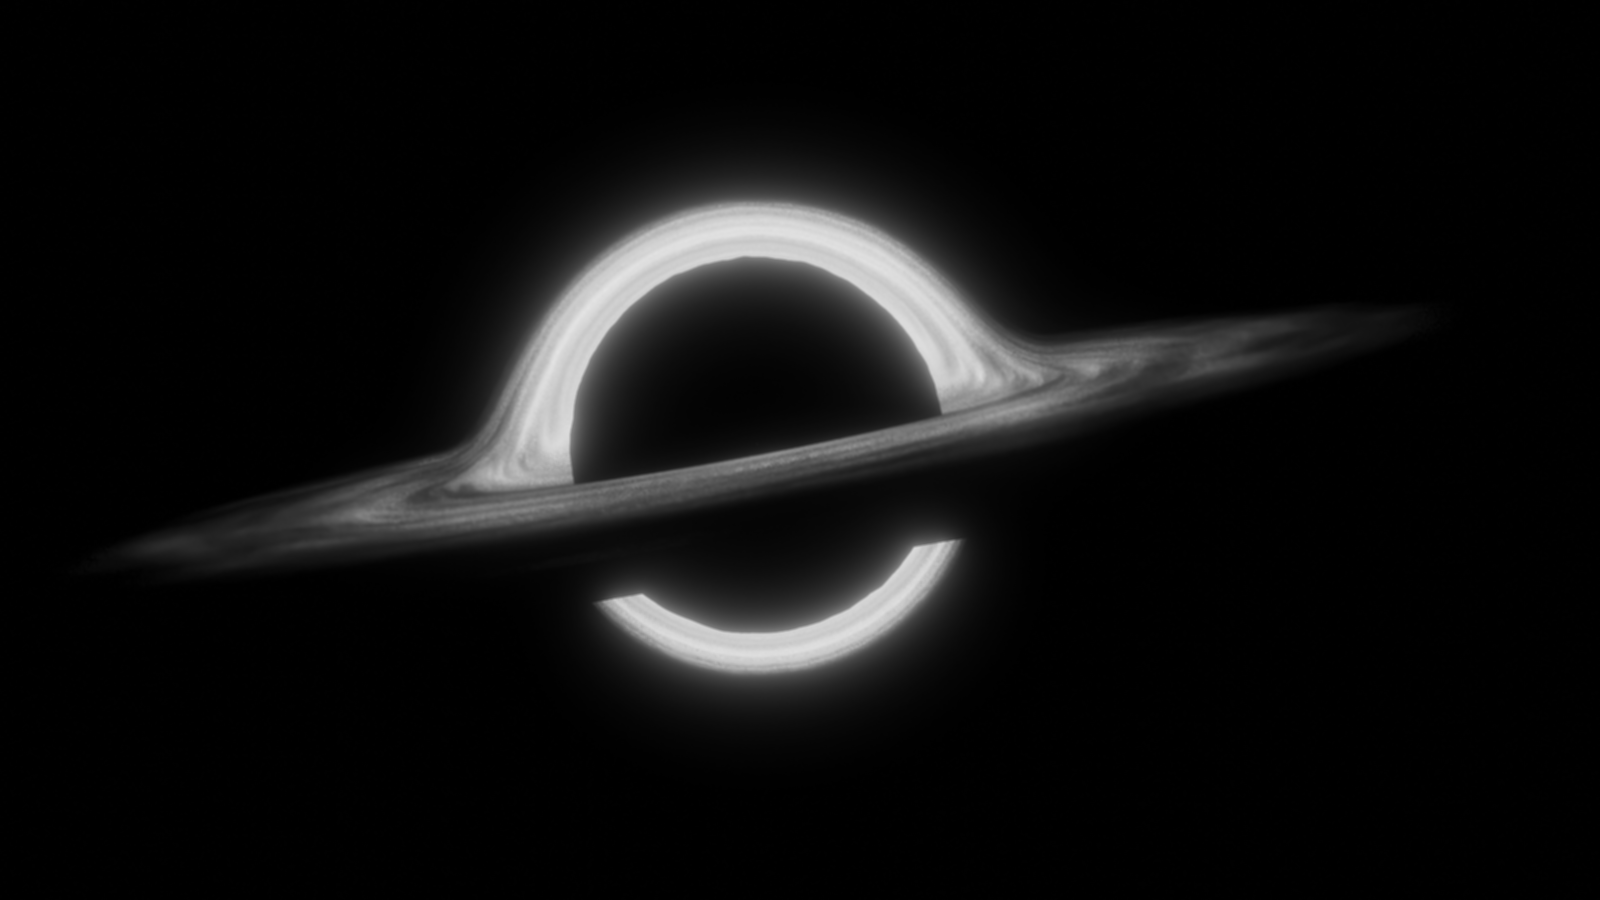

Filtro com L = 15


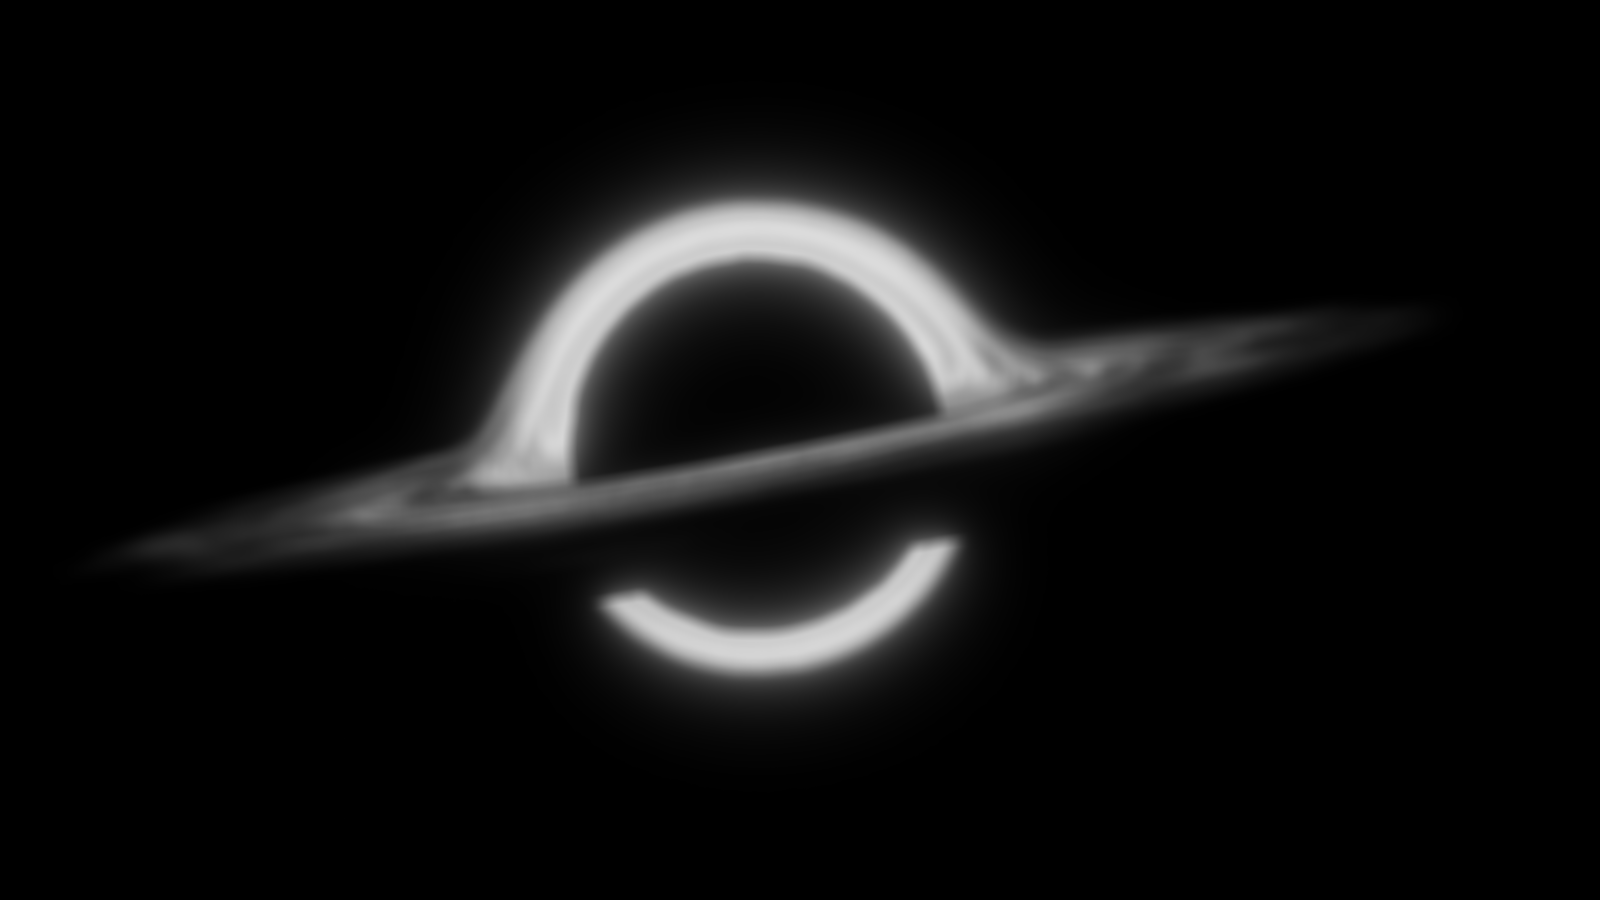

In [53]:
def printfiltro2D(L):
  h = np.ones((L,L))  # criação de matriz L x L, todos elementos iguais a 1
  # Exibe a resposta ao impulso 
  h = h/np.sum(h) # normalização (é a versão que iremos usar na filtragem)
  im_output = cv.filter2D( im_gray, -1, h )  # convolução 2D (pesquise o que significa o parâmetro 'ddepth')
  print("Filtro com L = " + str(L))
  cv2_imshow(im_output)  # exibe a imagem colorida original

print("Imagem fonte")
cv2_imshow(im_gray)
printfiltro2D(3)
printfiltro2D(15)

3. Repita as duas questões acima para o filtro gaussiano 2D com $\sigma = 3$ e $\sigma = 9$. A resposta ao impulso deve estar centrada na matriz de suporte, cujas dimensões devem ser suficientes para conter os elementos compreendidos no intervalo de $−5\sigma$ a $5\sigma$ em torno da média nas duas dimensões.

Implementação do filtro gaussiano 2D com sigma= 3
Resposta ao impulso normalizada: 
 [[1.18001231e-02 1.05592141e-02 9.44879992e-03 8.45515766e-03
  7.56600751e-03 6.77036099e-03 6.05838520e-03 5.42128128e-03
  4.85117563e-03 4.34102269e-03 3.88451778e-03 3.47601923e-03
  3.11047868e-03 2.78337861e-03 2.49067662e-03 2.22875536e-03
  1.99437793e-03 1.78464778e-03 1.59697300e-03 1.42903423e-03
  1.27875601e-03 1.14428116e-03 1.02394777e-03 9.16268722e-04
  8.19913277e-04 7.33690637e-04 6.56535228e-04 5.87493535e-04
  5.25712314e-04 4.70428048e-04 4.20957513e-04]
 [1.05592141e-02 9.44879992e-03 8.45515766e-03 7.56600751e-03
  6.77036099e-03 6.05838520e-03 5.42128128e-03 4.85117563e-03
  4.34102269e-03 3.88451778e-03 3.47601923e-03 3.11047868e-03
  2.78337861e-03 2.49067662e-03 2.22875536e-03 1.99437793e-03
  1.78464778e-03 1.59697300e-03 1.42903423e-03 1.27875601e-03
  1.14428116e-03 1.02394777e-03 9.16268722e-04 8.19913277e-04
  7.33690637e-04 6.56535228e-04 5.87493535e-04 5.25712314e-04

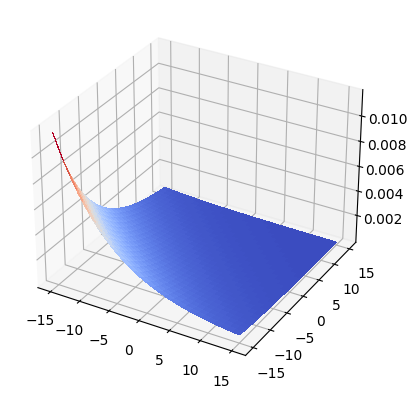

Implementação do filtro gaussiano 2D com sigma= 9
Resposta ao impulso normalizada: 
 [[3.30570643e-04 3.26514613e-04 3.22508349e-04 ... 1.11541936e-04
  1.10173341e-04 1.08821538e-04]
 [3.26514613e-04 3.22508349e-04 3.18551242e-04 ... 1.10173341e-04
  1.08821538e-04 1.07486321e-04]
 [3.22508349e-04 3.18551242e-04 3.14642687e-04 ... 1.08821538e-04
  1.07486321e-04 1.06167487e-04]
 ...
 [1.11541936e-04 1.10173341e-04 1.08821538e-04 ... 3.76367466e-05
  3.71749519e-05 3.67188233e-05]
 [1.10173341e-04 1.08821538e-04 1.07486321e-04 ... 3.71749519e-05
  3.67188233e-05 3.62682913e-05]
 [1.08821538e-04 1.07486321e-04 1.06167487e-04 ... 3.67188233e-05
  3.62682913e-05 3.58232872e-05]]


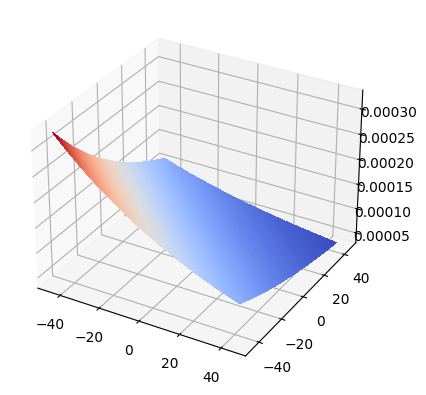

In [54]:
import numpy as np    
import matplotlib.pyplot as plt 
from matplotlib import cm
import cv2 as cv                  
from google.colab.patches import cv2_imshow
#from scipy.ndimage import gaussian_filter

# Implementação do filtro gaussiano 2D
M = 300 # número de pontos da FFT
for sigma in [3, 9]: # Implementando para sigma = [3, 9]
    size = int(5*sigma)
    media = size/2
    print("Implementação do filtro gaussiano 2D com sigma=", sigma)
    A = (1/np.sqrt(2*np.pi*(sigma**2)))
    x, y = np.mgrid[-size: size + 1, -size: size + 1]
    # Exibe a resposta ao impulso
    h1 = A*np.exp(( -(x-media)*2 - (y-media)*2)/(2*(sigma**2)))  
    sumh = h1.sum()
    h1 = h1/np.sum(h1) # normalização
    print('Resposta ao impulso normalizada: \n', h1)

    # Vetores de dados
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Traçado da superfície
    surf = ax.plot_surface(x, y, h1, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

    plt.show()